In [1]:
import pandas as pd
import numpy as np

# load data

In [21]:
stint = pd.read_csv('data/eng1_2122_singleapm_stint_eg.csv')
prior = pd.read_csv('data/eng2122_priors.csv')

In [4]:
list(stint.columns)

['League',
 'Gender',
 'Country',
 'Season',
 'Match_Date',
 'Matchweek',
 'Home_Team',
 'Home_Formation',
 'Home_Score_Final',
 'Home_xG',
 'Home_Goals',
 'Home_Yellow_Cards',
 'Home_Red_Cards',
 'Away_Team',
 'Away_Formation',
 'Away_Score_Final',
 'Away_xG',
 'Away_Goals',
 'Away_Yellow_Cards',
 'Away_Red_Cards',
 'Game_URL',
 'Team',
 'Home_Away',
 'EventID',
 'Is_Pens',
 'Event_Half',
 'Event_Type',
 'Event_Players',
 'Score_Progression',
 'Penalty_Number',
 'goals_home_cumu',
 'goals_away_cumu',
 'goals_total_cumu',
 'redcard_home_cumu',
 'redcard_away_cumu',
 'goals_home',
 'goals_away',
 'goals_home_rate',
 'goals_away_rate',
 'goals_diff_rate',
 'up_3',
 'up_2',
 'up_1',
 'down_1',
 'down_2',
 'down_3',
 'sub_in',
 'sub_out',
 'Ederson',
 'João Cancelo',
 'Rodri',
 'Bernardo Silva',
 'Aymeric Laporte',
 'Rúben Dias',
 'Kevin De Bruyne',
 'Phil Foden',
 'Raheem Sterling',
 'Jack Grealish',
 'Gabriel Jesus',
 'İlkay Gündoğan',
 'Kyle Walker',
 'Riyad Mahrez',
 'John Stones',
 'O

In [26]:
prior[prior['Player'] == 'Lucas Digne']

,Player,Season_End_Year,Squad,Comp,Min,Pred,Pred_scaled,Pred*Min
453,Lucas Digne,2022.0,Aston Villa,Premier League,1269.0,77.541213,-0.082879,98399.799366
454,Lucas Digne,2022.0,Everton,Premier League,1170.0,72.521076,-1.961184,84849.658406


In [23]:
prior['Pred*Min'] = prior['Pred'] * prior['Min']
prior

,Player,Season_End_Year,Squad,Comp,Min,Pred,Pred_scaled,Pred*Min
0,Ederson,2022.0,Manchester City,Premier League,3330.0,84.560893,2.543563e+00,281587.774588
1,João Cancelo,2022.0,Manchester City,Premier League,3227.0,88.217127,3.911557e+00,284676.668784
2,Rodri,2022.0,Manchester City,Premier League,2884.0,86.130458,3.130822e+00,248400.240083
3,Bernardo Silva,2022.0,Manchester City,Premier League,2857.0,85.774063,2.997475e+00,245056.497421
4,Aymeric Laporte,2022.0,Manchester City,Premier League,2828.0,87.024025,3.465153e+00,246103.942279
5,Rúben Dias,2022.0,Manchester City,Premier League,2402.0,87.715697,3.723945e+00,210693.104411
6,Kevin De Bruyne,2022.0,Manchester City,Premier League,2201.0,84.544725,2.537514e+00,186082.940815
7,Phil Foden,2022.0,Manchester City,Premier League,2128.0,85.048061,2.725839e+00,180982.274411
8,Raheem Sterling,2022.0,Manchester City,Premier League,2128.0,86.304678,3.196007e+00,183656.355534
9,Jack Grealish,2022.0,Manchester City,Premier League,1914.0,84.624955,2.567532e+00,161972.164682


In [34]:
temp = prior.groupby('Player', sort = False)['Pred*Min'].sum() / prior.groupby('Player', sort = False)['Min'].sum()
adj_prior = pd.DataFrame(temp, columns = {'weighted_pred'}).reset_index()
adj_prior = adj_prior.fillna(np.mean(adj_prior['weighted_pred']))
adj_prior

,Player,weighted_pred
0,Ederson,84.560893
1,João Cancelo,88.217127
2,Rodri,86.130458
3,Bernardo Silva,85.774063
4,Aymeric Laporte,87.024025
5,Rúben Dias,87.715697
6,Kevin De Bruyne,84.544725
7,Phil Foden,85.048061
8,Raheem Sterling,86.304678
9,Jack Grealish,84.624955


In [453]:
from sklearn.preprocessing import StandardScaler

In [241]:
scaler = preprocessing.StandardScaler().fit(adj_prior['weighted_pred'].values.reshape(-1, 1))
adj_prior['scaled_pred'] = scaler.transform(adj_prior['weighted_pred'].values.reshape(-1, 1))
adj_prior

,Player,weighted_pred,scaled_pred
0,Ederson,84.560893,2.546737
1,João Cancelo,88.217127,3.926561
2,Rodri,86.130458,3.139074
3,Bernardo Silva,85.774063,3.004574
4,Aymeric Laporte,87.024025,3.476297
5,Rúben Dias,87.715697,3.737326
6,Kevin De Bruyne,84.544725,2.540635
7,Phil Foden,85.048061,2.730589
8,Raheem Sterling,86.304678,3.204823
9,Jack Grealish,84.624955,2.570913


In [129]:
type(adj_prior['weighted_pred'].values.reshape(-1, 1))

numpy.ndarray

In [373]:
prior_intercept = 83.525826232
prior_intercept = scaler.transform(np.array(prior_intercept).reshape(-1, 1))
prior_intercept

array([[2.1561134]])

## try model first time

When you solve the traditional OLS we basically solve the following linear system: 

$(X^T*X)*b = X^T*y$

When you solve a regularized OLS with all coefficients shrank to zero you solve: 

 $(X^T*X + λI)*b = X^T*y$
where λ is the regularization constant and I is the identity matrix. 

If you want to have different "prior" for each coefficient you solve the following equations: 

 $(X^T*X + λI)*b = X^T*y + I*L$
where L is a vector with the priors. 

In [376]:
# train_x is the design matrix, where columns are players and rows are stints filled with 0,1,-1 for not playing, offense, defense (or how else you set it up)
train_x = stint.loc[:, 'Ederson' : 'Jonathan Tomkinson']
train_y = stint['xG_diff']
prior_vec = adj_prior['scaled_pred']
prior_vec

0      2.546737
1      3.926561
2      3.139074
3      3.004574
4      3.476297
5      3.737326
6      2.540635
7      2.730589
8      3.204823
9      2.570913
10     2.707940
11     2.796799
12     1.766810
13     1.422941
14     0.645444
15     3.093200
16     1.950706
17     1.389354
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
         ...   
648   -1.227140
649    1.025066
650   -0.114746
651   -0.855976
652   -1.921667
653    0.339885
654   -1.371132
655   -2.543045
656   -1.100889
657   -1.585972
658   -1.334518
659   -1.559536
660    0.000000
661    0.000000
662    0.000000
663    0.000000
664    0.000000
665    0.000000
666    0.000000
667    0.000000
668    0.000000
669    0.000000
670    0.000000
671    0.000000
672    0.000000
673    0.000000
674    0.000000
675    0.000000
676    0.000000
677    0.000000
Name: scaled_pred, Lengt

In [377]:
prior_vec = pd.concat([pd.DataFrame(prior_intercept), prior_vec]).reset_index(drop = True)
prior_vec

,0
0,2.156113
1,2.546737
2,3.926561
3,3.139074
4,3.004574
5,3.476297
6,3.737326
7,2.540635
8,2.730589
9,3.204823


In [84]:
import scipy

### Ridge regression without prior, $\lambda$ = 1000

In [343]:
# train_x is the design matrix, where columns are players and rows are stints filled with 0,1,-1 for not playing, offense, defense (or how else you set it up)

# I am concatenating a column with all ones for the intercept of the model 
X = np.concatenate([np.ones(train_x.shape[0]).reshape((train_x.shape[0],1)),train_x],axis=1)

## here I am taking the transpose of X and storing it at X_t
X_t = X.T

## the matrix multiplication of X^T*X
h = np.dot(X_t,X)
## the multiplication between matrix X^T and vector train_y, which is the vector of your dependent variable
q2_tmp = X_t.dot(train_y)

## here I am creating a diagonal matrix with dimensionality equal to the number of columns of X
## lambda is the regularization constant 
#eye = np.multiply(np.eye(X.shape[1]+1),lambda = 1)
eye = np.multiply(np.eye(X.shape[1]),1000)
## we set the first element of the diagonal 0 since we are not going to regularize the intercept
eye[0,0] = 0

## following we are just defining two matrices that will eventually provide the solution to our ratings
## prior_vec is just a vector with the priors for each coefficient (include the intercept too but this will not be regularized since we set eye[0,0] to 0
q1 = h+eye
q2 = q2_tmp.reshape(-1, 1) + eye.dot(prior_vec).reshape(-1, 1)
#beta = scipy.linalg.solve(q1, q2)
beta = scipy.linalg.solve(q1, q2_tmp)

In [344]:
len(beta[1:])

678

In [345]:
result = pd.concat([adj_prior['Player'], pd.DataFrame(beta[1:], columns = {'rating'})], axis = 1)
result.sort_values(by = 'rating', ascending = False)
result

,Player,rating
0,Ederson,0.017776
1,João Cancelo,0.014346
2,Rodri,0.015566
3,Bernardo Silva,0.011423
4,Aymeric Laporte,0.016242
5,Rúben Dias,0.011484
6,Kevin De Bruyne,0.006097
7,Phil Foden,0.009362
8,Raheem Sterling,0.010005
9,Jack Grealish,0.013301


### Ridge regression with prior, $\lambda$ = 1000

In [346]:
# train_x is the design matrix, where columns are players and rows are stints filled with 0,1,-1 for not playing, offense, defense (or how else you set it up)

# I am concatenating a column with all ones for the intercept of the model 
X = np.concatenate([np.ones(train_x.shape[0]).reshape((train_x.shape[0],1)),train_x],axis=1)

## here I am taking the transpose of X and storing it at X_t
X_t = X.T

## the matrix multiplication of X^T*X
h = np.dot(X_t,X)
## the multiplication between matrix X^T and vector train_y, which is the vector of your dependent variable
q2_tmp = X_t.dot(train_y)

## here I am creating a diagonal matrix with dimensionality equal to the number of columns of X
## lambda is the regularization constant 
#eye = np.multiply(np.eye(X.shape[1]+1),lambda = 1)
eye = np.multiply(np.eye(X.shape[1]),1000)
## we set the first element of the diagonal 0 since we are not going to regularize the intercept
eye[0,0] = 0

## following we are just defining two matrices that will eventually provide the solution to our ratings
## prior_vec is just a vector with the priors for each coefficient (include the intercept too but this will not be regularized since we set eye[0,0] to 0
q1 = h+eye
q2 = q2_tmp.reshape(-1, 1) + eye.dot(prior_vec).reshape(-1, 1)
beta = scipy.linalg.solve(q1, q2)
#beta = scipy.linalg.solve(q1, q2_tmp)

In [347]:
result = pd.concat([adj_prior['Player'], pd.DataFrame(beta[1:], columns = {'rating'})], axis = 1)
result.sort_values(by = 'rating', ascending = False)

,Player,rating
38,Mohamed Salah,2.867032
46,Luis Díaz,2.444360
47,Roberto Firmino,2.380826
361,Bruno Guimarães,2.312911
103,Son Heung-min,2.141402
75,Reece James,1.976661
645,Teemu Pukki,1.965321
189,Paul Pogba,1.898816
344,Martin Dúbravka,1.876570
112,Dejan Kulusevski,1.837735


## account for time  / stint_length

In [459]:
t = stint['stint_length']
train_x_t = (train_x.T * t).T
type(train_x_t)

pandas.core.frame.DataFrame

In [460]:
sc = StandardScaler(copy = False)
train_x_t_scaled = sc.fit_transform(train_x_t.values)
train_x_t_scaled = pd.DataFrame(data = train_x_t_scaled, columns = train_x_t.columns)
train_x_t_scaled

C:\Users\ad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Ederson,João Cancelo,Rodri,Bernardo Silva,Aymeric Laporte,Rúben Dias,Kevin De Bruyne,Phil Foden,Raheem Sterling,Jack Grealish,...,Christoph Zimmermann,Tony Springett,Jon Rowe,Bali Mumba,Thomas Dickson-Peters,Liam Gibbs,Abu Kamara,Jon McCracken,Michael McGovern,Jonathan Tomkinson
0,0.005129,0.00043,-0.005155,0.002726,-0.012779,0.018846,0.001713,0.002391,-0.013799,0.011478,...,-0.045032,-0.004323,0.031495,0.036522,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005129,0.00043,-0.005155,0.002726,-0.012779,0.018846,0.001713,0.002391,-0.013799,0.011478,...,-0.045032,-0.004323,0.031495,0.036522,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005129,0.00043,-0.005155,0.002726,-0.012779,0.018846,0.001713,0.002391,-0.013799,0.011478,...,-0.045032,-0.004323,0.031495,0.036522,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005129,0.00043,-0.005155,0.002726,-0.012779,0.018846,0.001713,0.002391,-0.013799,0.011478,...,-0.045032,-0.004323,0.031495,0.036522,0.0,0.0,0.0,0.0,0.0,0.0
4,0.005129,0.00043,-0.005155,0.002726,-0.012779,0.018846,0.001713,0.002391,-0.013799,0.011478,...,-0.045032,-0.004323,0.031495,0.036522,0.0,0.0,0.0,0.0,0.0,0.0
5,0.005129,0.00043,-0.005155,0.002726,-0.012779,0.018846,0.001713,0.002391,-0.013799,0.011478,...,-0.045032,-0.004323,0.031495,0.036522,0.0,0.0,0.0,0.0,0.0,0.0
6,0.005129,0.00043,-0.005155,0.002726,-0.012779,0.018846,0.001713,0.002391,-0.013799,0.011478,...,-0.045032,-0.004323,0.031495,0.036522,0.0,0.0,0.0,0.0,0.0,0.0
7,0.005129,0.00043,-0.005155,0.002726,-0.012779,0.018846,0.001713,0.002391,-0.013799,0.011478,...,-0.045032,-0.004323,0.031495,0.036522,0.0,0.0,0.0,0.0,0.0,0.0
8,0.005129,0.00043,-0.005155,0.002726,-0.012779,0.018846,0.001713,0.002391,-0.013799,0.011478,...,-0.045032,-0.004323,0.031495,0.036522,0.0,0.0,0.0,0.0,0.0,0.0
9,0.005129,0.00043,-0.005155,0.002726,-0.012779,0.018846,0.001713,0.002391,-0.013799,0.011478,...,-0.045032,-0.004323,0.031495,0.036522,0.0,0.0,0.0,0.0,0.0,0.0


In [477]:
# train_x is the design matrix, where columns are players and rows are stints filled with 0,1,-1 for not playing, offense, defense (or how else you set it up)

# I am concatenating a column with all ones for the intercept of the model 
X = np.concatenate([np.ones(train_x_t.shape[0]).reshape((train_x_t.shape[0],1)),train_x_t_scaled],axis=1)

## here I am taking the transpose of X and storing it at X_t
X_t = X.T

## the matrix multiplication of X^T*X
h = np.dot(X_t,X)
## the multiplication between matrix X^T and vector train_y, which is the vector of your dependent variable
q2_tmp = X_t.dot(train_y)

## here I am creating a diagonal matrix with dimensionality equal to the number of columns of X
## lambda is the regularization constant 
#eye = np.multiply(np.eye(X.shape[1]+1),lambda = 1)
eye = np.multiply(np.eye(X.shape[1]),1e5)
## we set the first element of the diagonal 0 since we are not going to regularize the intercept
eye[0,0] = 0

## following we are just defining two matrices that will eventually provide the solution to our ratings
## prior_vec is just a vector with the priors for each coefficient (include the intercept too but this will not be regularized since we set eye[0,0] to 0
q1 = h + eye
q2 = q2_tmp.reshape(-1, 1) + eye.dot(prior_vec).reshape(-1, 1)
beta = scipy.linalg.solve(q1, q2)
#beta = scipy.linalg.solve(q1, q2_tmp)

In [478]:
result = pd.concat([adj_prior['Player'], pd.DataFrame(beta[1:], columns = {'rating'})], axis = 1)
result.sort_values(by = 'rating', ascending = False)

,Player,rating
38,Mohamed Salah,3.928307
103,Son Heung-min,2.983249
1,João Cancelo,2.939170
5,Rúben Dias,2.842007
47,Roberto Firmino,2.726371
100,Harry Kane,2.653059
46,Luis Díaz,2.647696
75,Reece James,2.621452
4,Aymeric Laporte,2.536429
15,Oleksandr Zinchenko,2.491964


In [479]:
# train_x is the design matrix, where columns are players and rows are stints filled with 0,1,-1 for not playing, offense, defense (or how else you set it up)

# I am concatenating a column with all ones for the intercept of the model 
X = np.concatenate([np.ones(train_x_t.shape[0]).reshape((train_x_t.shape[0],1)),train_x_t_scaled],axis=1)

## here I am taking the transpose of X and storing it at X_t
X_t = X.T

## the matrix multiplication of X^T*X
h = np.dot(X_t,X)
## the multiplication between matrix X^T and vector train_y, which is the vector of your dependent variable
q2_tmp = X_t.dot(train_y)

## here I am creating a diagonal matrix with dimensionality equal to the number of columns of X
## lambda is the regularization constant 
#eye = np.multiply(np.eye(X.shape[1]+1),lambda = 1)
eye = np.multiply(np.eye(X.shape[1]),1e6)
## we set the first element of the diagonal 0 since we are not going to regularize the intercept
eye[0,0] = 0

## following we are just defining two matrices that will eventually provide the solution to our ratings
## prior_vec is just a vector with the priors for each coefficient (include the intercept too but this will not be regularized since we set eye[0,0] to 0
q1 = h + eye
q2 = q2_tmp.reshape(-1, 1) + eye.dot(prior_vec).reshape(-1, 1)
#beta = scipy.linalg.solve(q1, q2)
beta = scipy.linalg.solve(q1, q2_tmp)

In [480]:
result = pd.concat([adj_prior['Player'], pd.DataFrame(beta[1:], columns = {'rating'})], axis = 1)
result.sort_values(by = 'rating', ascending = False)

,Player,rating
0,Ederson,0.000248
1,João Cancelo,0.000240
4,Aymeric Laporte,0.000237
2,Rodri,0.000236
34,Virgil van Dijk,0.000230
33,Alisson,0.000221
5,Rúben Dias,0.000220
11,İlkay Gündoğan,0.000216
3,Bernardo Silva,0.000214
38,Mohamed Salah,0.000213


## try with cross-validation to tune lambda

In [217]:
from sklearn.linear_model import RidgeCV

In [484]:
ridge_model = RidgeCV(alphas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10], 
                      scoring = 'neg_mean_squared_error', store_cv_values = True).fit(train_x_t_scaled, train_y)
ridge_model.score(train_x_t_scaled, train_y)

0.18968747227759164

In [485]:
pd.DataFrame(ridge_model.cv_values_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.012366,0.011864,0.011174,0.017540,0.024630,0.019208,0.054594,0.076019,0.008942,0.000290,-0.000016,-3.659383e-05,-3.849585e-05,-3.868491e-05
1,0.229864,0.229145,0.228034,0.236284,0.244539,0.228251,0.226834,0.150576,0.019920,0.001453,0.000160,4.168898e-05,2.995898e-05,2.878716e-05
2,0.057971,0.057735,0.057394,0.060197,0.063329,0.059605,0.069440,0.062801,0.009209,0.000646,0.000081,3.045481e-05,2.545702e-05,2.495789e-05
3,0.138376,0.139440,0.147213,0.170531,0.153101,0.091385,0.108543,0.053793,0.004693,0.000130,0.000058,5.775504e-05,5.780889e-05,5.781502e-05
4,-0.004553,-0.004549,-0.004542,-0.004713,-0.004606,-0.004341,-0.003588,-0.001063,-0.000189,-0.000018,0.000004,6.571898e-06,6.798641e-06,6.821322e-06
5,-0.016608,-0.016394,-0.014850,-0.009827,-0.007323,-0.004968,0.007668,0.007022,0.000604,-0.000193,-0.000215,-2.159428e-04,-2.160408e-04,-2.160505e-04
6,-0.178405,-0.176973,-0.166608,-0.132526,-0.114103,-0.092545,-0.005802,0.015534,0.001331,-0.000162,-0.000108,-9.900723e-05,-9.805178e-05,-9.795582e-05
7,0.005763,0.005829,0.006236,0.007328,0.007044,0.008060,0.011751,0.006763,0.000797,0.000052,0.000011,7.209053e-06,6.862296e-06,6.827687e-06
8,0.097231,0.096819,0.093384,0.083491,0.083445,0.098256,0.087472,0.038640,0.003916,0.000216,0.000032,1.674573e-05,1.528227e-05,1.513629e-05
9,0.603631,0.602489,0.594626,0.567209,0.546074,0.491926,0.299633,0.093128,0.009400,0.000688,0.000120,6.914852e-05,6.408274e-05,6.357676e-05


In [486]:
ridge_model.alpha_

10000.0

In [487]:
ridge_result = pd.concat([adj_prior['Player'], pd.DataFrame(ridge_model.coef_, columns = {'coef'})], axis = 1)
ridge_result.sort_values(by = 'coef', ascending = False)

,Player,coef
91,Ross Barkley,0.005672
4,Aymeric Laporte,0.005448
2,Rodri,0.005209
34,Virgil van Dijk,0.005081
189,Paul Pogba,0.004977
0,Ederson,0.004807
42,Fabinho,0.004792
1,João Cancelo,0.004630
49,Kostas Tsimikas,0.004621
11,İlkay Gündoğan,0.004553


Ridge regression looks like:

$minβ||Y−Xβ||2+λ1||β||2$
If you want to instead compute

$β∗=argminβ||Y−Xβ||2+λ1||β−β0||2$
I guess you could just turn this into shrinking towards zero using the new variable

$θ=β−β0.$
So you'd solve:

$θ∗:=argminθ||Y−Xβ0−Xθ||2+λ1||θ||2$
Then apply the change of variables again (i.e., $β∗:=θ∗+β0$).

So to recap, if I have some black box function RidgeRegression(Y,X,λ), I can use it to solve for an arbitrary prior β0 simply by calling RidgeRegression(Y−Xβ0,X,λ).

In [488]:
train_y_prior = train_y - np.dot(train_x_t_scaled, adj_prior['scaled_pred'])
train_y_prior

0        27.953293
1        31.615977
2        17.218516
3        20.160156
4         0.257601
5         3.451404
6         8.749590
7         0.862179
8         2.389021
9         5.512440
10     -126.166577
11      -69.538702
12        0.257601
13       -8.368618
14      -16.934771
15       -8.297198
16      -25.259140
17      -34.105298
18       -4.055508
19        0.257601
20      -24.703301
21        0.257601
22       -7.193102
23      -80.292575
24      -55.425170
25       -6.542974
26      -22.163573
27        0.257601
28       -0.468891
29       -3.092697
           ...    
3949   -143.055866
3950      0.257601
3951      0.257601
3952    -66.196881
3953    -73.875035
3954   -103.656571
3955    -36.514848
3956     -7.219792
3957    -37.557628
3958      8.345793
3959     -0.466373
3960      0.212011
3961      0.257601
3962     -4.016047
3963     -1.603053
3964     -0.524865
3965     -0.893269
3966     -9.446404
3967     -3.178013
3968    -88.023451
3969   -312.333507
3970   -116.

In [534]:
prior_ridge_model = RidgeCV(#alphas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10],
                            alphas = [1, 1e1, 1e2, 1e3, 5000, 1e4, 50000, 1e5, 50000, 1e6, 1e7, 1e8, 1e9, 1e10],
                            #alphas = [1e5, 1e6, 1e7, 1e8, 1e9, 1e10],
                            #scoring = 'neg_mean_squared_error', 
                            store_cv_values = True).fit(train_x_t_scaled, train_y_prior)
prior_ridge_model.score(train_x_t_scaled, train_y_prior)

0.9999799519774945

In [535]:
cv_values = pd.DataFrame(prior_ridge_model.cv_values_)
cv_values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.014323,0.012290,0.000304,0.002604,0.664460,2.150781,80.231184,211.008445,80.231184,668.730255,768.082535,779.032817,780.138847,780.249560
1,0.139189,0.147415,0.304839,0.299160,0.362009,1.938639,101.375196,269.569059,101.375196,855.914016,982.807716,996.787080,998.198993,998.340325
2,0.027987,0.029167,0.050578,0.050877,0.067330,0.430683,27.447244,75.977868,27.447244,252.098981,290.922897,295.210512,295.643670,295.687030
3,0.273747,0.087223,0.852239,12.834462,18.163838,20.996115,81.720063,151.438335,81.720063,358.246553,400.410795,405.024488,405.490150,405.536760
4,0.000530,0.000488,0.000125,0.000263,0.002525,0.005533,0.021857,0.031420,0.021857,0.049827,0.052788,0.053102,0.053133,0.053136
5,0.730571,0.761089,1.058926,1.529313,1.227345,1.004655,2.286484,4.205807,2.286484,10.298098,11.575463,11.715712,11.729872,11.731290
6,0.195540,0.284370,1.741756,4.320096,1.423626,0.451024,5.211968,16.767705,5.211968,63.947950,74.782141,75.984271,76.105775,76.117938
7,0.001824,0.001399,0.002319,0.105459,0.338082,0.401136,0.073130,0.002615,0.073130,0.509566,0.676389,0.695481,0.697417,0.697611
8,0.018491,0.051277,0.827303,6.684986,14.610637,17.527492,7.633050,1.697229,7.633050,3.203135,5.298981,5.552545,5.578387,5.580976
9,0.539057,0.562264,1.141203,2.749225,15.576073,22.708301,7.459905,0.171012,7.459905,20.798474,29.038740,29.995623,30.092773,30.102502


In [536]:
prior_ridge_model.alpha_

1.0

$β∗:=θ∗+β0$

In [537]:
beta_star = prior_ridge_model.coef_ + adj_prior['scaled_pred']
beta_star

0     -0.433482
1      0.250657
2      0.205085
3      0.125592
4      0.209559
5      0.194940
6      0.123921
7      0.139802
8      0.096370
9      0.124417
10     0.115353
11     0.120948
12     0.186040
13     0.117227
14     0.106777
15     0.124706
16     0.076753
17     0.114607
18     0.052086
19     0.036750
20    -0.075882
21     0.047662
22     0.002724
23     0.003459
24     0.016994
25     0.016390
26     0.000000
27     0.000000
28     0.000000
29     0.000000
         ...   
648   -0.055574
649    1.514860
650    0.057956
651   -0.020539
652   -0.028254
653   -0.004883
654   -0.016352
655   -0.007700
656   -0.054254
657   -0.042178
658   -0.036883
659    0.003433
660    0.874415
661    0.012672
662   -0.013641
663   -0.008395
664    0.001677
665   -0.020079
666   -0.000639
667   -0.016334
668   -0.013687
669    0.001776
670    0.005857
671   -0.005027
672    0.000000
673    0.000000
674    0.000000
675    0.000000
676    0.000000
677    0.000000
Name: scaled_pred, Lengt

In [538]:
prior_ridge_result = pd.concat([adj_prior['Player'], pd.DataFrame(beta_star.values, columns = {'beta*'})], axis = 1)
prior_ridge_result.sort_values(by = 'beta*', ascending = False)

,Player,beta*
344,Martin Dúbravka,1.729172
576,Nick Pope,1.538941
649,Tim Krul,1.514860
379,Vicente Guaita,1.472226
273,Robert Sánchez,1.335623
544,Illan Meslier,1.159422
211,Łukasz Fabiański,1.113239
175,David de Gea,1.109229
508,Jordan Pickford,1.010726
362,Karl Darlow,1.003825


## plot lambda selection

In [539]:
cv_values.sum()

0     6.353145e+02
1     1.034123e+03
2     1.035091e+04
3     9.401342e+04
4     4.446411e+05
5     9.665513e+05
6     5.259080e+06
7     8.545026e+06
8     5.259080e+06
9     1.573380e+07
10    1.696157e+07
11    1.709262e+07
12    1.710581e+07
13    1.710713e+07
dtype: float64

In [505]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean MSE')

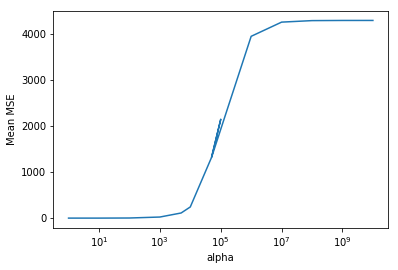

In [540]:
ax = plt.gca()
ax.plot([1, 1e1, 1e2, 1e3, 5000, 1e4, 50000, 1e5, 50000, 1e6, 1e7, 1e8, 1e9, 1e10], cv_values.mean())
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Mean MSE')

# save data

In [111]:
adj_prior.to_csv('data/eng1_2122_priors_adj.csv', index = False)